In [1]:
from fractions import *
import matplotlib.pyplot as plt
from math import comb

"""
from sympy import Symbol

def Spread(n): # This function is fine for a nice printout of the formula, but it is not efficient for evaluation purposes.
    s=Symbol('s')
    p=0
    for k in range(1,n+1):
        p+=((-4)**(k-1))/(n+k)*comb(n+k,2*k)*s**k # when evaluating, it replaces s and computes s^k power at each step
    return 2 * n * p
"""

# A more efficient scheme would be to create the list with the coefficients only once
def SpreadPoly(n): # returns a list with the coefficients of S_n(s) in a reverse order
    p = []
    for k in range(1,n+1):
        p += [Fraction(-n * comb(n+k,n-k) * (-4)**k, (2*(n+k)))]
    return p[::-1]

# Then using an evaluation function that takes advantage of the previous computation of the last power of x
def PolyEval(p, x): # evaluates the polynumber at x in an efficient way
    r = Fraction(0,1)  # Fraction (or Rational) to avoid float overflowing issues
    for k in range(len(p)):
        i = p[k] # the coefficients are computed in the reverse order from higher powers to lower
        r = x * (i + r) # takes advantage of a_0 + a_1 x + ... + a_n x^n =  a_0 + x (a_1 + (... x(a_{n-1} + x a_n)))
    return r

def getPoints(n, density): # denisty = number of points to generate
    p = SpreadPoly(n) # get the list of S_n(s) coefficients
    i = Fraction(1, density) # tiny steps of 1/density 
    k = Fraction(-1,density) # to let the process start at x = 0
    x, y = [], []
    for j in range(density+1):
        k += i # advance one step in the x axis
        x.append(k)
        y.append(PolyEval(p, k))
    return x, y



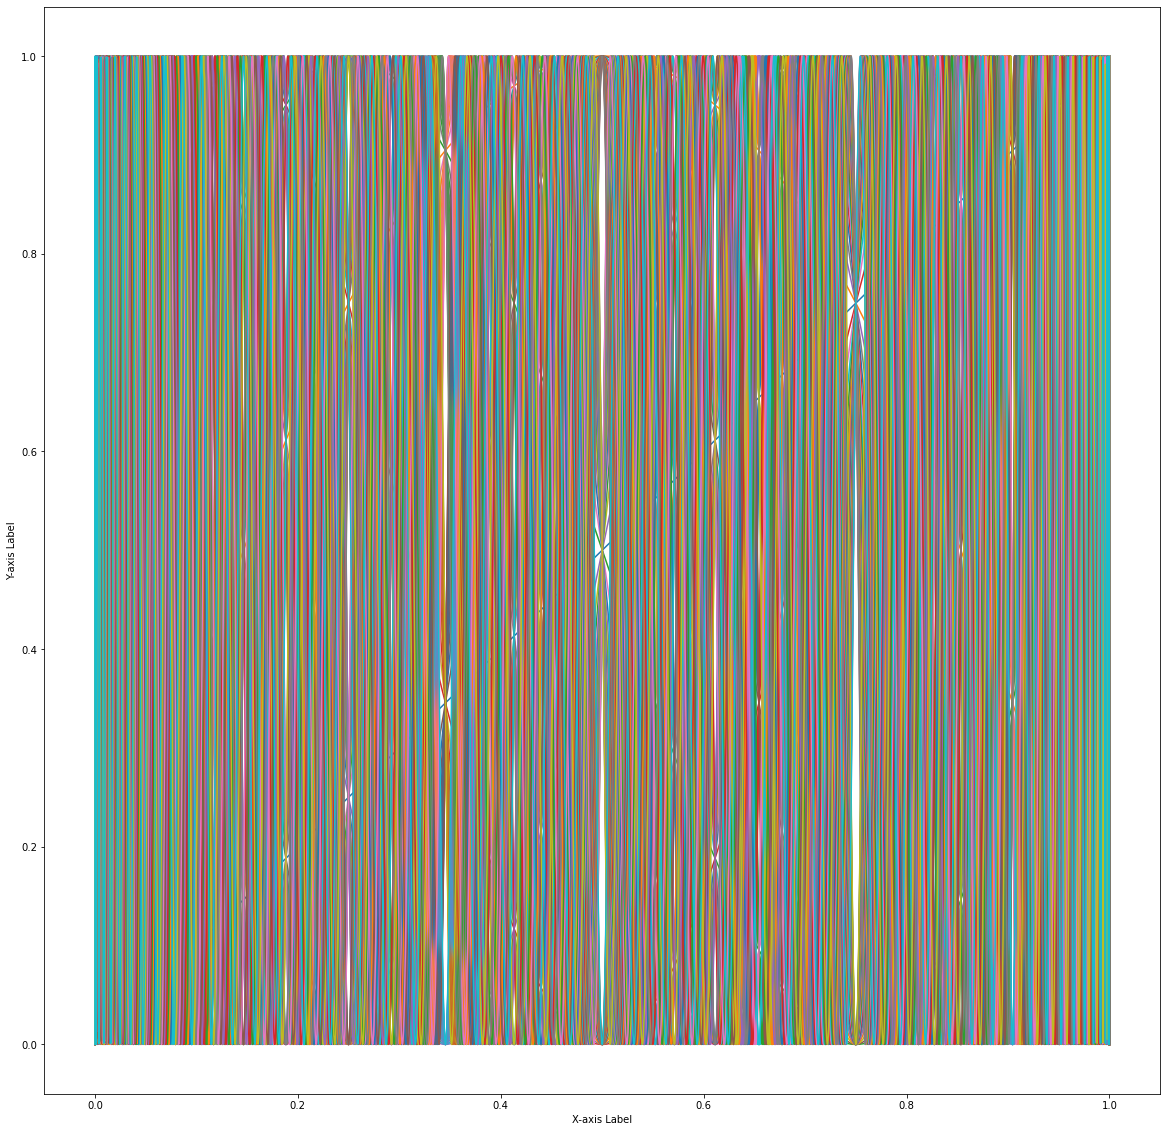

In [2]:
density = 2**12
fig = plt.figure(figsize = (20, 20))
# Create the plot from S_1 to S_100 (takes 5 minutes)
for n in range(1,101):
    x, y = getPoints(n,density)
    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')
    plt.plot(x, y)

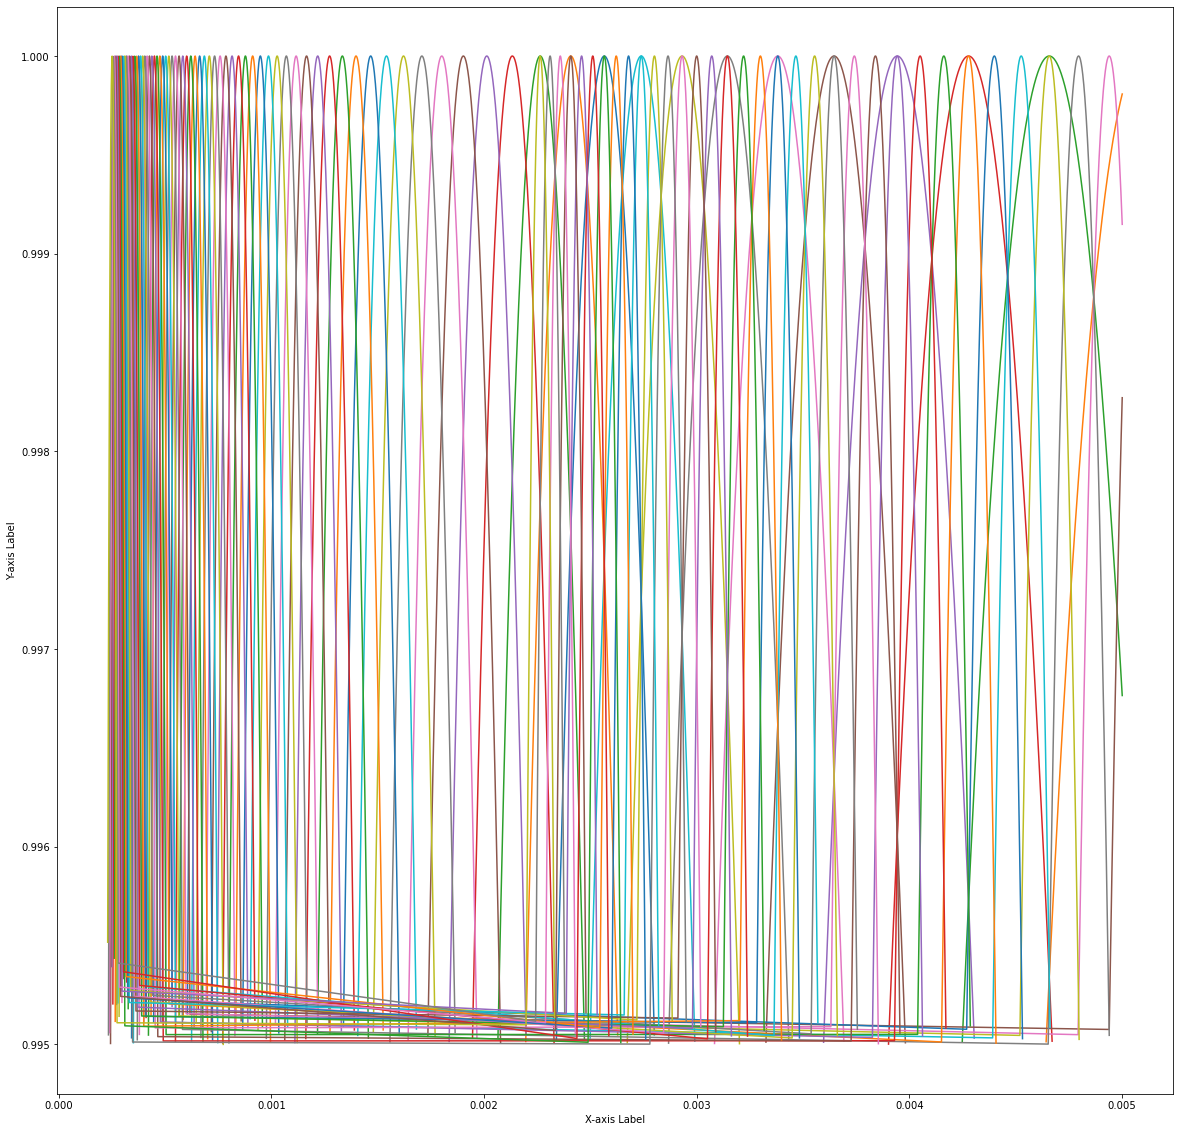

In [5]:
def getPointsInBox(n, density, xBounds, yBounds):  # to zoom in a particular box
    p = SpreadPoly(n)
    i = Fraction(xBounds[1]-xBounds[0], density) # tiny steps of (x_end-x_start)/density 
    k = xBounds[0] + Fraction(xBounds[0]-xBounds[1], density)
    x, y = [], []
    for j in range(density+1):
        k += i
        tmp = PolyEval(p, k)
        if (yBounds[0] <= tmp) and (tmp <= yBounds[1]): # the point is between the y's bounds
            x.append(k)
            y.append(tmp)
    return x, y

density = 2**12
fig = plt.figure(figsize = (20, 20))
# Create the box from the bottom-left corner (0, .995) to the top-right corner (.005, 1)
x_from, x_to = Fraction(0,1000), Fraction(5,1000)
xBounds = [x_from, x_to] 
y_from, y_to = Fraction(995,1000), Fraction(1000,1000)
yBounds = [y_from, y_to]
for n in range(1,100):
    x, y = getPointsInBox(n,density,xBounds,yBounds)
    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')
    # the image may look a bit distorted at the top or bottom, 
    # since matplotlib will try to join the points belonging to the same line, which might be
    # vertically crossing the box more than once
    plt.plot(x, y)
